**Description:**

Project Description

**Project Name:** Churn Predition - Die Zeit

**Team:** Carlotta Ulm, Silas Mederer, Jonas Bechthold

**Date:** 2020-10-26 to ...

# Setting up environment and imports

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import math
import itertools
from time import time

# visualization
import seaborn as sns
sns.set(style="white")   

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix

# warnings handler
import warnings
warnings.filterwarnings("ignore")

random_state = 100           # Ensures modeling results can be replicated
np.random.seed(42)

# Display Options for pandas
pd.set_option('display.max_columns', None) # Sets maximum columns displayed in tables
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# Variables for plot sizes
matplotlib.rc('font', size=20)          # controls default text sizes
matplotlib.rc('axes', titlesize=16)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=18)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=18)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=18)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=14)    # legend fontsize
matplotlib.rc('figure', titlesize=20)

####################################################
# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#geodaten
import geopandas as gpd

# Business Understanding 

## General

## Background


## Key Questions

## Dataset Description

Let's get an idea about the columns and find out what they mean:

In [3]:
df = pd.read_csv('data/f_chtr_churn_traintable_nf.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161760 entries, 0 to 161759
Columns: 170 entries, Unnamed: 0 to date_x
dtypes: float64(31), int64(121), object(18)
memory usage: 209.8+ MB


In [4]:
df.head()

,Unnamed: 0,auftrag_new_id,liefer_beginn_evt,kanal,objekt_name,aboform_name,zahlung_rhythmus_name,lesedauer,rechnungsmonat,zahlung_weg_name,studentenabo,plz_1,plz_2,plz_3,ort,metropole,land_iso_code,shop_kauf,unterbrechung,anrede,titel,avg_churn,zon_che_opt_in,zon_sit_opt_in,zon_zp_grey,zon_premium,zon_boa,zon_kommentar,zon_sonstige,zon_zp_red,zon_rawr,zon_community,zon_app_sonstige,zon_schach,zon_blog_kommentare,zon_quiz,cnt_abo,cnt_abo_diezeit,cnt_abo_diezeit_digital,cnt_abo_magazin,cnt_umwandlungsstatus2_dkey,abo_registrierung_min,nl_zeitbrief,nl_zeitshop,nl_zeitverlag_hamburg,nl_fdz_organisch,nl_blacklist_sum,nl_bounced_sum,nl_aktivitaet,nl_registrierung_min,nl_sperrliste_sum,nl_opt_in_sum,boa_reg,che_reg,sit_reg,sso_reg,received_anzahl_1w,received_anzahl_1m,received_anzahl_3m,received_anzahl_6m,opened_anzahl_1w,opened_anzahl_1m,opened_anzahl_3m,openedanzahl_6m,clicked_anzahl_1w,clicked_anzahl_1m,clicked_anzahl_3m,clicked_anzahl_6m,unsubscribed_anzahl_1w,unsubscribed_anzahl_1m,unsubscribed_anzahl_3m,unsubscribed_anzahl_6m,openrate_1w,clickrate_1w,openrate_1m,clickrate_1m,openrate_3m,clickrate_3m,received_anzahl_bestandskunden_1w,received_anzahl_bestandskunden_1m,received_anzahl_bestandskunden_3m,received_anzahl_bestandskunden_6m,opened_anzahl_bestandskunden_1w,opened_anzahl_bestandskunden_1m,opened_anzahl_bestandskunden_3m,openedanzahl_bestandskunden_6m,clicked_anzahl_bestandskunden_1w,clicked_anzahl_bestandskunden_1m,clicked_anzahl_bestandskunden_3m,clicked_anzahl_bestandskunden_6m,unsubscribed_anzahl_bestandskunden_1w,unsubscribed_anzahl_bestandskunden_1m,unsubscribed_anzahl_bestandskunden_3m,unsubscribed_anzahl_bestandskunden_6m,openrate_bestandskunden_1w,clickrate_bestandskunden_1w,openrate_bestandskunden_1m,clickrate_bestandskunden_1m,openrate_bestandskunden_3m,clickrate_bestandskunden_3m,received_anzahl_produktnews_1w,received_anzahl_produktnews_1m,received_anzahl_produktnews_3m,received_anzahl_produktnews_6m,opened_anzahl_produktnews_1w,opened_anzahl_produktnews_1m,opened_anzahl_produktnews_3m,openedanzahl_produktnews_6m,clicked_anzahl_produktnews_1w,clicked_anzahl_produktnews_1m,clicked_anzahl_produktnews_3m,clicked_anzahl_produktnews_6m,unsubscribed_anzahl_produktnews_1w,unsubscribed_anzahl_produktnews_1m,unsubscribed_anzahl_produktnews_3m,unsubscribed_anzahl_produktnews_6m,openrate_produktnews_1w,clickrate_produktnews_1w,openrate_produktnews_1m,clickrate_produktnews_1m,openrate_produktnews_3m,clickrate_produktnews_3m,received_anzahl_hamburg_1w,received_anzahl_hamburg_1m,received_anzahl_hamburg_3m,received_anzahl_hamburg_6m,opened_anzahl_hamburg_1w,opened_anzahl_hamburg_1m,opened_anzahl_hamburg_3m,openedanzahl_hamburg_6m,clicked_anzahl_hamburg_1w,clicked_anzahl_hamburg_1m,clicked_anzahl_hamburg_3m,clicked_anzahl_hamburg_6m,unsubscribed_anzahl_hamburg_1w,unsubscribed_anzahl_hamburg_1m,unsubscribed_anzahl_hamburg_3m,unsubscribed_anzahl_hamburg_6m,openrate_hamburg_1w,clickrate_hamburg_1w,openrate_hamburg_1m,clickrate_hamburg_1m,openrate_hamburg_3m,clickrate_hamburg_3m,received_anzahl_zeitbrief_1w,received_anzahl_zeitbrief_1m,received_anzahl_zeitbrief_3m,received_anzahl_zeitbrief_6m,opened_anzahl_zeitbrief_1w,opened_anzahl_zeitbrief_1m,opened_anzahl_zeitbrief_3m,openedanzahl_zeitbrief_6m,clicked_anzahl_zeitbrief_1w,clicked_anzahl_zeitbrief_1m,clicked_anzahl_zeitbrief_3m,clicked_anzahl_zeitbrief_6m,unsubscribed_anzahl_zeitbrief_1w,unsubscribed_anzahl_zeitbrief_1m,unsubscribed_anzahl_zeitbrief_3m,unsubscribed_anzahl_zeitbrief_6m,openrate_zeitbrief_1w,clickrate_zeitbrief_1w,openrate_zeitbrief_1m,clickrate_zeitbrief_1m,openrate_zeitbrief_3m,clickrate_zeitbrief_3m,training_set,kuendigungs_eingangs_datum,churn,date_x
0,0,8F55996E-22DD-4450-808F-9F2410C65F0C,2018-08-29,E-Mailing,ZEIT Digital,Negative Option,vierteljährlich,19,0,Bankeinzug,0,3,37,372,Neu-Eichenberg,0,DE,0,0,Herr,kein Titel,0.412416,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,2,2015-03-12 12:33:54,0,0,0,0,0,0,10,2013-03-13 14:50:27,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [5]:
df.tail()

,Unnamed: 0,auftrag_new_id,liefer_beginn_evt,kanal,objekt_name,aboform_name,zahlung_rhythmus_name,lesedauer,rechnungsmonat,zahlung_weg_name,studentenabo,plz_1,plz_2,plz_3,ort,metropole,land_iso_code,shop_kauf,unterbrechung,anrede,titel,avg_churn,zon_che_opt_in,zon_sit_opt_in,zon_zp_grey,zon_premium,zon_boa,zon_kommentar,zon_sonstige,zon_zp_red,zon_rawr,zon_community,zon_app_sonstige,zon_schach,zon_blog_kommentare,zon_quiz,cnt_abo,cnt_abo_diezeit,cnt_abo_diezeit_digital,cnt_abo_magazin,cnt_umwandlungsstatus2_dkey,abo_registrierung_min,nl_zeitbrief,nl_zeitshop,nl_zeitverlag_hamburg,nl_fdz_organisch,nl_blacklist_sum,nl_bounced_sum,nl_aktivitaet,nl_registrierung_min,nl_sperrliste_sum,nl_opt_in_sum,boa_reg,che_reg,sit_reg,sso_reg,received_anzahl_1w,received_anzahl_1m,received_anzahl_3m,received_anzahl_6m,opened_anzahl_1w,opened_anzahl_1m,opened_anzahl_3m,openedanzahl_6m,clicked_anzahl_1w,clicked_anzahl_1m,clicked_anzahl_3m,clicked_anzahl_6m,unsubscribed_anzahl_1w,unsubscribed_anzahl_1m,unsubscribed_anzahl_3m,unsubscribed_anzahl_6m,openrate_1w,clickrate_1w,openrate_1m,clickrate_1m,openrate_3m,clickrate_3m,received_anzahl_bestandskunden_1w,received_anzahl_bestandskunden_1m,received_anzahl_bestandskunden_3m,received_anzahl_bestandskunden_6m,opened_anzahl_bestandskunden_1w,opened_anzahl_bestandskunden_1m,opened_anzahl_bestandskunden_3m,openedanzahl_bestandskunden_6m,clicked_anzahl_bestandskunden_1w,clicked_anzahl_bestandskunden_1m,clicked_anzahl_bestandskunden_3m,clicked_anzahl_bestandskunden_6m,unsubscribed_anzahl_bestandskunden_1w,unsubscribed_anzahl_bestandskunden_1m,unsubscribed_anzahl_bestandskunden_3m,unsubscribed_anzahl_bestandskunden_6m,openrate_bestandskunden_1w,clickrate_bestandskunden_1w,openrate_bestandskunden_1m,clickrate_bestandskunden_1m,openrate_bestandskunden_3m,clickrate_bestandskunden_3m,received_anzahl_produktnews_1w,received_anzahl_produktnews_1m,received_anzahl_produktnews_3m,received_anzahl_produktnews_6m,opened_anzahl_produktnews_1w,opened_anzahl_produktnews_1m,opened_anzahl_produktnews_3m,openedanzahl_produktnews_6m,clicked_anzahl_produktnews_1w,clicked_anzahl_produktnews_1m,clicked_anzahl_produktnews_3m,clicked_anzahl_produktnews_6m,unsubscribed_anzahl_produktnews_1w,unsubscribed_anzahl_produktnews_1m,unsubscribed_anzahl_produktnews_3m,unsubscribed_anzahl_produktnews_6m,openrate_produktnews_1w,clickrate_produktnews_1w,openrate_produktnews_1m,clickrate_produktnews_1m,openrate_produktnews_3m,clickrate_produktnews_3m,received_anzahl_hamburg_1w,received_anzahl_hamburg_1m,received_anzahl_hamburg_3m,received_anzahl_hamburg_6m,opened_anzahl_hamburg_1w,opened_anzahl_hamburg_1m,opened_anzahl_hamburg_3m,openedanzahl_hamburg_6m,clicked_anzahl_hamburg_1w,clicked_anzahl_hamburg_1m,clicked_anzahl_hamburg_3m,clicked_anzahl_hamburg_6m,unsubscribed_anzahl_hamburg_1w,unsubscribed_anzahl_hamburg_1m,unsubscribed_anzahl_hamburg_3m,unsubscribed_anzahl_hamburg_6m,openrate_hamburg_1w,clickrate_hamburg_1w,openrate_hamburg_1m,clickrate_hamburg_1m,openrate_hamburg_3m,clickrate_hamburg_3m,received_anzahl_zeitbrief_1w,received_anzahl_zeitbrief_1m,received_anzahl_zeitbrief_3m,received_anzahl_zeitbrief_6m,opened_anzahl_zeitbrief_1w,opened_anzahl_zeitbrief_1m,opened_anzahl_zeitbrief_3m,openedanzahl_zeitbrief_6m,clicked_anzahl_zeitbrief_1w,clicked_anzahl_zeitbrief_1m,clicked_anzahl_zeitbrief_3m,clicked_anzahl_zeitbrief_6m,unsubscribed_anzahl_zeitbrief_1w,unsubscribed_anzahl_zeitbrief_1m,unsubscribed_anzahl_zeitbrief_3m,unsubscribed_anzahl_zeitbrief_6m,openrate_zeitbrief_1w,clickrate_zeitbrief_1w,openrate_zeitbrief_1m,clickrate_zeitbrief_1m,openrate_zeitbrief_3m,clickrate_zeitbrief_3m,training_set,kuendigungs_eingangs_datum,churn,date_x
161755,161755,9A442CDE-588A-4BF9-A172-37DE53FCEF08,2018-10-04,Telefonmarketing,DIE ZEIT,Festabo,vierteljährlich,13,0,Rechnung,0,7,79,791,Freiburg,0,DE,0,0,Frau,kein Titel,0.484702,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,1,2011-03-09 12:09:34,0,0,0,0,0,0,4,2017-11-07 14:07:50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [6]:
df.drop("Unnamed: 0", axis=1,inplace=True)

In [7]:
columnlist = list(df.columns) 

In [8]:
columnlist

['auftrag_new_id',
 'liefer_beginn_evt',
 'kanal',
 'objekt_name',
 'aboform_name',
 'zahlung_rhythmus_name',
 'lesedauer',
 'rechnungsmonat',
 'zahlung_weg_name',
 'studentenabo',
 'plz_1',
 'plz_2',
 'plz_3',
 'ort',
 'metropole',
 'land_iso_code',
 'shop_kauf',
 'unterbrechung',
 'anrede',
 'titel',
 'avg_churn',
 'zon_che_opt_in',
 'zon_sit_opt_in',
 'zon_zp_grey',
 'zon_premium',
 'zon_boa',
 'zon_kommentar',
 'zon_sonstige',
 'zon_zp_red',
 'zon_rawr',
 'zon_community',
 'zon_app_sonstige',
 'zon_schach',
 'zon_blog_kommentare',
 'zon_quiz',
 'cnt_abo',
 'cnt_abo_diezeit',
 'cnt_abo_diezeit_digital',
 'cnt_abo_magazin',
 'cnt_umwandlungsstatus2_dkey',
 'abo_registrierung_min',
 'nl_zeitbrief',
 'nl_zeitshop',
 'nl_zeitverlag_hamburg',
 'nl_fdz_organisch',
 'nl_blacklist_sum',
 'nl_bounced_sum',
 'nl_aktivitaet',
 'nl_registrierung_min',
 'nl_sperrliste_sum',
 'nl_opt_in_sum',
 'boa_reg',
 'che_reg',
 'sit_reg',
 'sso_reg',
 'received_anzahl_1w',
 'received_anzahl_1m',
 'received_

In [9]:
df.describe().round(2)

,lesedauer,rechnungsmonat,studentenabo,metropole,shop_kauf,unterbrechung,avg_churn,zon_che_opt_in,zon_sit_opt_in,zon_zp_grey,zon_premium,zon_boa,zon_kommentar,zon_sonstige,zon_zp_red,zon_rawr,zon_community,zon_app_sonstige,zon_schach,zon_blog_kommentare,zon_quiz,cnt_abo,cnt_abo_diezeit,cnt_abo_diezeit_digital,cnt_abo_magazin,cnt_umwandlungsstatus2_dkey,nl_zeitbrief,nl_zeitshop,nl_zeitverlag_hamburg,nl_fdz_organisch,nl_blacklist_sum,nl_bounced_sum,nl_aktivitaet,nl_sperrliste_sum,nl_opt_in_sum,boa_reg,che_reg,sit_reg,sso_reg,received_anzahl_1w,received_anzahl_1m,received_anzahl_3m,received_anzahl_6m,opened_anzahl_1w,opened_anzahl_1m,opened_anzahl_3m,openedanzahl_6m,clicked_anzahl_1w,clicked_anzahl_1m,clicked_anzahl_3m,clicked_anzahl_6m,unsubscribed_anzahl_1w,unsubscribed_anzahl_1m,unsubscribed_anzahl_3m,unsubscribed_anzahl_6m,openrate_1w,clickrate_1w,openrate_1m,clickrate_1m,openrate_3m,clickrate_3m,received_anzahl_bestandskunden_1w,received_anzahl_bestandskunden_1m,received_anzahl_bestandskunden_3m,received_anzahl_bestandskunden_6m,opened_anzahl_bestandskunden_1w,opened_anzahl_bestandskunden_1m,opened_anzahl_bestandskunden_3m,openedanzahl_bestandskunden_6m,clicked_anzahl_bestandskunden_1w,clicked_anzahl_bestandskunden_1m,clicked_anzahl_bestandskunden_3m,clicked_anzahl_bestandskunden_6m,unsubscribed_anzahl_bestandskunden_1w,unsubscribed_anzahl_bestandskunden_1m,unsubscribed_anzahl_bestandskunden_3m,unsubscribed_anzahl_bestandskunden_6m,openrate_bestandskunden_1w,clickrate_bestandskunden_1w,openrate_bestandskunden_1m,clickrate_bestandskunden_1m,openrate_bestandskunden_3m,clickrate_bestandskunden_3m,received_anzahl_produktnews_1w,received_anzahl_produktnews_1m,received_anzahl_produktnews_3m,received_anzahl_produktnews_6m,opened_anzahl_produktnews_1w,opened_anzahl_produktnews_1m,opened_anzahl_produktnews_3m,openedanzahl_produktnews_6m,clicked_anzahl_produktnews_1w,clicked_anzahl_produktnews_1m,clicked_anzahl_produktnews_3m,clicked_anzahl_produktnews_6m,unsubscribed_anzahl_produktnews_1w,unsubscribed_anzahl_produktnews_1m,unsubscribed_anzahl_produktnews_3m,unsubscribed_anzahl_produktnews_6m,openrate_produktnews_1w,clickrate_produktnews_1w,openrate_produktnews_1m,clickrate_produktnews_1m,openrate_produktnews_3m,clickrate_produktnews_3m,received_anzahl_hamburg_1w,received_anzahl_hamburg_1m,received_anzahl_hamburg_3m,received_anzahl_hamburg_6m,opened_anzahl_hamburg_1w,opened_anzahl_hamburg_1m,opened_anzahl_hamburg_3m,openedanzahl_hamburg_6m,clicked_anzahl_hamburg_1w,clicked_anzahl_hamburg_1m,clicked_anzahl_hamburg_3m,clicked_anzahl_hamburg_6m,unsubscribed_anzahl_hamburg_1w,unsubscribed_anzahl_hamburg_1m,unsubscribed_anzahl_hamburg_3m,unsubscribed_anzahl_hamburg_6m,openrate_hamburg_1w,clickrate_hamburg_1w,openrate_hamburg_1m,clickrate_hamburg_1m,openrate_hamburg_3m,clickrate_hamburg_3m,received_anzahl_zeitbrief_1w,received_anzahl_zeitbrief_1m,received_anzahl_zeitbrief_3m,received_anzahl_zeitbrief_6m,opened_anzahl_zeitbrief_1w,opened_anzahl_zeitbrief_1m,opened_anzahl_zeitbrief_3m,openedanzahl_zeitbrief_6m,clicked_anzahl_zeitbrief_1w,clicked_anzahl_zeitbrief_1m,clicked_anzahl_zeitbrief_3m,clicked_anzahl_zeitbrief_6m,unsubscribed_anzahl_zeitbrief_1w,unsubscribed_anzahl_zeitbrief_1m,unsubscribed_anzahl_zeitbrief_3m,unsubscribed_anzahl_zeitbrief_6m,openrate_zeitbrief_1w,clickrate_zeitbrief_1w,openrate_zeitbrief_1m,clickrate_zeitbrief_1m,openrate_zeitbrief_3m,clickrate_zeitbrief_3m,training_set,churn
count,161760.00,161760.0,161760.00,161760.00,161760.00,161760.0,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.00,161760.0

## Get an idea of the column names by sampling

In [10]:
df.sample(2)

,auftrag_new_id,liefer_beginn_evt,kanal,objekt_name,aboform_name,zahlung_rhythmus_name,lesedauer,rechnungsmonat,zahlung_weg_name,studentenabo,plz_1,plz_2,plz_3,ort,metropole,land_iso_code,shop_kauf,unterbrechung,anrede,titel,avg_churn,zon_che_opt_in,zon_sit_opt_in,zon_zp_grey,zon_premium,zon_boa,zon_kommentar,zon_sonstige,zon_zp_red,zon_rawr,zon_community,zon_app_sonstige,zon_schach,zon_blog_kommentare,zon_quiz,cnt_abo,cnt_abo_diezeit,cnt_abo_diezeit_digital,cnt_abo_magazin,cnt_umwandlungsstatus2_dkey,abo_registrierung_min,nl_zeitbrief,nl_zeitshop,nl_zeitverlag_hamburg,nl_fdz_organisch,nl_blacklist_sum,nl_bounced_sum,nl_aktivitaet,nl_registrierung_min,nl_sperrliste_sum,nl_opt_in_sum,boa_reg,che_reg,sit_reg,sso_reg,received_anzahl_1w,received_anzahl_1m,received_anzahl_3m,received_anzahl_6m,opened_anzahl_1w,opened_anzahl_1m,opened_anzahl_3m,openedanzahl_6m,clicked_anzahl_1w,clicked_anzahl_1m,clicked_anzahl_3m,clicked_anzahl_6m,unsubscribed_anzahl_1w,unsubscribed_anzahl_1m,unsubscribed_anzahl_3m,unsubscribed_anzahl_6m,openrate_1w,clickrate_1w,openrate_1m,clickrate_1m,openrate_3m,clickrate_3m,received_anzahl_bestandskunden_1w,received_anzahl_bestandskunden_1m,received_anzahl_bestandskunden_3m,received_anzahl_bestandskunden_6m,opened_anzahl_bestandskunden_1w,opened_anzahl_bestandskunden_1m,opened_anzahl_bestandskunden_3m,openedanzahl_bestandskunden_6m,clicked_anzahl_bestandskunden_1w,clicked_anzahl_bestandskunden_1m,clicked_anzahl_bestandskunden_3m,clicked_anzahl_bestandskunden_6m,unsubscribed_anzahl_bestandskunden_1w,unsubscribed_anzahl_bestandskunden_1m,unsubscribed_anzahl_bestandskunden_3m,unsubscribed_anzahl_bestandskunden_6m,openrate_bestandskunden_1w,clickrate_bestandskunden_1w,openrate_bestandskunden_1m,clickrate_bestandskunden_1m,openrate_bestandskunden_3m,clickrate_bestandskunden_3m,received_anzahl_produktnews_1w,received_anzahl_produktnews_1m,received_anzahl_produktnews_3m,received_anzahl_produktnews_6m,opened_anzahl_produktnews_1w,opened_anzahl_produktnews_1m,opened_anzahl_produktnews_3m,openedanzahl_produktnews_6m,clicked_anzahl_produktnews_1w,clicked_anzahl_produktnews_1m,clicked_anzahl_produktnews_3m,clicked_anzahl_produktnews_6m,unsubscribed_anzahl_produktnews_1w,unsubscribed_anzahl_produktnews_1m,unsubscribed_anzahl_produktnews_3m,unsubscribed_anzahl_produktnews_6m,openrate_produktnews_1w,clickrate_produktnews_1w,openrate_produktnews_1m,clickrate_produktnews_1m,openrate_produktnews_3m,clickrate_produktnews_3m,received_anzahl_hamburg_1w,received_anzahl_hamburg_1m,received_anzahl_hamburg_3m,received_anzahl_hamburg_6m,opened_anzahl_hamburg_1w,opened_anzahl_hamburg_1m,opened_anzahl_hamburg_3m,openedanzahl_hamburg_6m,clicked_anzahl_hamburg_1w,clicked_anzahl_hamburg_1m,clicked_anzahl_hamburg_3m,clicked_anzahl_hamburg_6m,unsubscribed_anzahl_hamburg_1w,unsubscribed_anzahl_hamburg_1m,unsubscribed_anzahl_hamburg_3m,unsubscribed_anzahl_hamburg_6m,openrate_hamburg_1w,clickrate_hamburg_1w,openrate_hamburg_1m,clickrate_hamburg_1m,openrate_hamburg_3m,clickrate_hamburg_3m,received_anzahl_zeitbrief_1w,received_anzahl_zeitbrief_1m,received_anzahl_zeitbrief_3m,received_anzahl_zeitbrief_6m,opened_anzahl_zeitbrief_1w,opened_anzahl_zeitbrief_1m,opened_anzahl_zeitbrief_3m,openedanzahl_zeitbrief_6m,clicked_anzahl_zeitbrief_1w,clicked_anzahl_zeitbrief_1m,clicked_anzahl_zeitbrief_3m,clicked_anzahl_zeitbrief_6m,unsubscribed_anzahl_zeitbrief_1w,unsubscribed_anzahl_zeitbrief_1m,unsubscribed_anzahl_zeitbrief_3m,unsubscribed_anzahl_zeitbrief_6m,openrate_zeitbrief_1w,clickrate_zeitbrief_1w,openrate_zeitbrief_1m,clickrate_zeitbrief_1m,openrate_zeitbrief_3m,clickrate_zeitbrief_3m,training_set,kuendigungs_eingangs_datum,churn,date_x
35384,772EC65E-50E3-49CA-98D8-2003C4DE5DF7,2018-08-16,andere,DIE ZEIT,Festabo,jährlich,21,0,Bankeinzug,1,1,10,105,Berlin,1,DE,0,0,Herr,kein Titel,0.282302,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1,1,2,2016-12-21 09:09:21,2,0,0,0,0,0,13,2016-12-20 07:38:02,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0

## Target Metric


## Business Scenario

# Data Mining

# Data Cleaning
Purpose: Fix the inconsistencies within the data and handle the missing values

## Drop empty, useless and one value columns

## Handling missing

## Replace missing

## Conclusion

# Data Exploration - EDA


In [11]:
def crosstab_evaluation(feature_column,target_column,relative=True):
    '''function to cross evaluate two features by a pandas cross table
    Inputs:
    feature_column: pandas Series of feature
    target_column: pandas Series of target (y-axis value)
    relative: False -> returns absolute values, True -> gives percentages
    
    Retunr:
    crosstable
    '''
    crosstable = pd.crosstab(feature_column,target_column)
    if relative:
        crosstable = crosstable.div(crosstable.sum(1),axis=0)
    
    return crosstable

def crosstab_barplot(crosstable,labellist,figsize_x=10,figsize_y=7,xlabelname='Default'):
    '''
    Function to plot a pandas crosstable. 
    
    Inputs:
    crosstable: a pandas crosstable
    labellist: a list with the labels of the data
    xlabelname: Name of the x axis feature
    '''
    crosstable.plot(kind='bar', stacked=True,figsize=(figsize_x,figsize_y))
    plt.xlabel(xlabelname)
    plt.ylabel('Frequency')
    
    #plt.title('Title');
    #plt.xticks(np.arange(2), ('60 months', '36 months',), fontsize=20)
    
    L=plt.legend(fontsize=20,loc=(1.04,0.83))
    L.get_texts()[0].set_text(labellist[0])
    L.get_texts()[1].set_text(labellist[1])

## Customer Data - Jonas

The following feature are considered as personal information and shortly described:
- anrede: Mr, Mrs
- titel: academic title
- plz_1: first letter of zip code
- plz_2: first two letters of zip code
- plz_3: first three letters of zip code
- ort: city
- metropole: is the city a metropolitan city
- land_iso_code: DE, A, CH (Germany, Austria, Switzerland)

### Anrede

In [116]:
legendlist = ['churn','no churn']

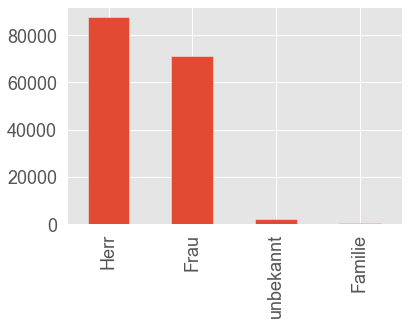

In [12]:
df.anrede.value_counts().plot(kind='bar');

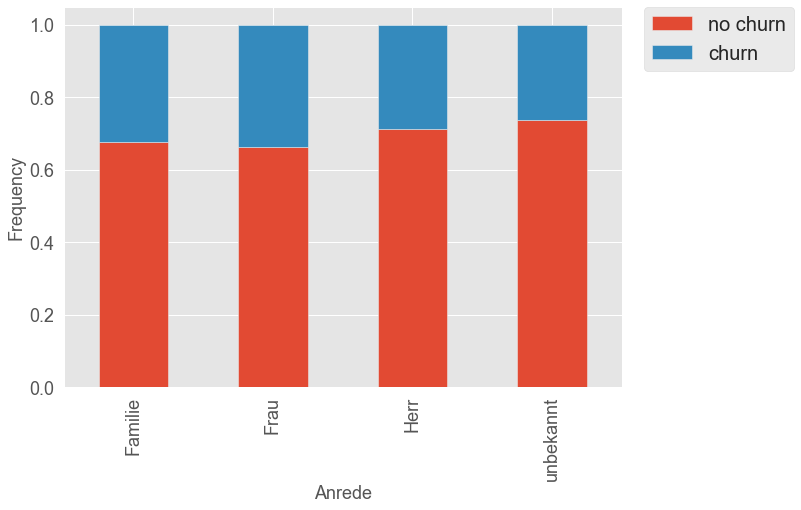

In [111]:
anrede_churn = crosstab_evaluation(df.anrede,df.churn)
crosstab_barplot(anrede_churn,['no churn','churn'],xlabelname='Anrede')

### Titel

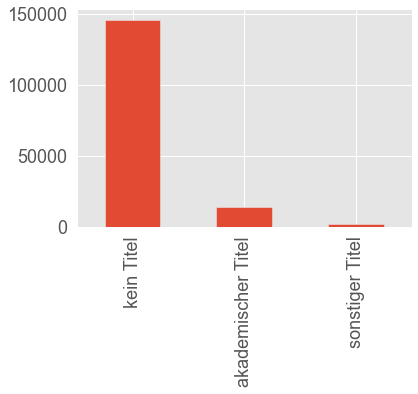

In [14]:
df.titel.value_counts().plot(kind='bar');

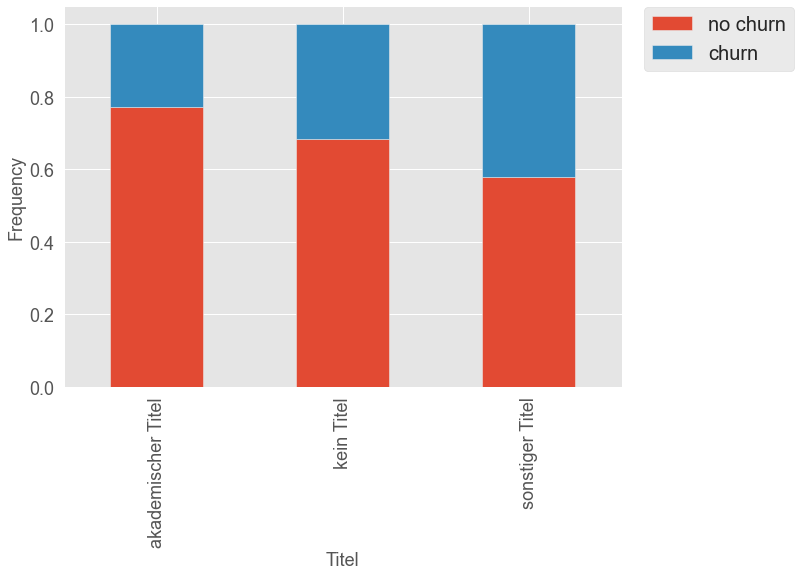

In [110]:
titel_churn = crosstab_evaluation(df.titel,df.churn)
crosstab_barplot(titel_churn,['no churn','churn'],xlabelname='Titel')

### plz 1 churn distribution

Find the missing number of zip codes:

In [84]:
df_zip_xx = df[df.plz_1 == 'xx']
print('Number of missing zip codes entries:',df_zip_xx.shape[0])
print('Percentage of missing zip codes in total:',df_zip_xx.shape[0]/df.shape[0])

Number of missing zip codes entries: 19788
Percentage of missing zip codes in total: 0.12232937685459941


There are 19788 entries with no zip code, which is about 12 percent. 

In [85]:
df_zip_xx.ort.value_counts().nlargest(10)

Wien          3966
Zürich        1359
Basel         580 
Graz          573 
Innsbruck     406 
Salzburg      352 
Bern          347 
Linz          325 
Winterthur    148 
Luzern        134 
Name: ort, dtype: int64

The xx zip codes are all non german cities (e.g. Switzerland), so we could divide the dataset into germany and out of germany areas.

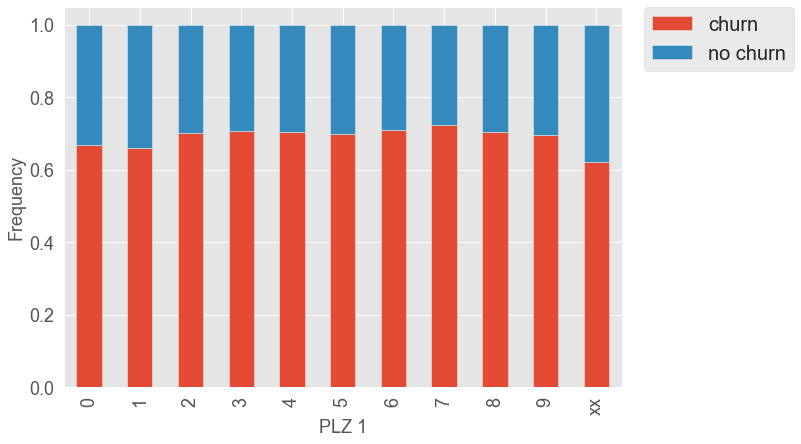

In [16]:
plz1_churn = crosstab_evaluation(df.plz_1,df.churn)
crosstab_barplot(plz1_churn,['churn','no churn'],xlabelname='PLZ 1')

### PLZ 2

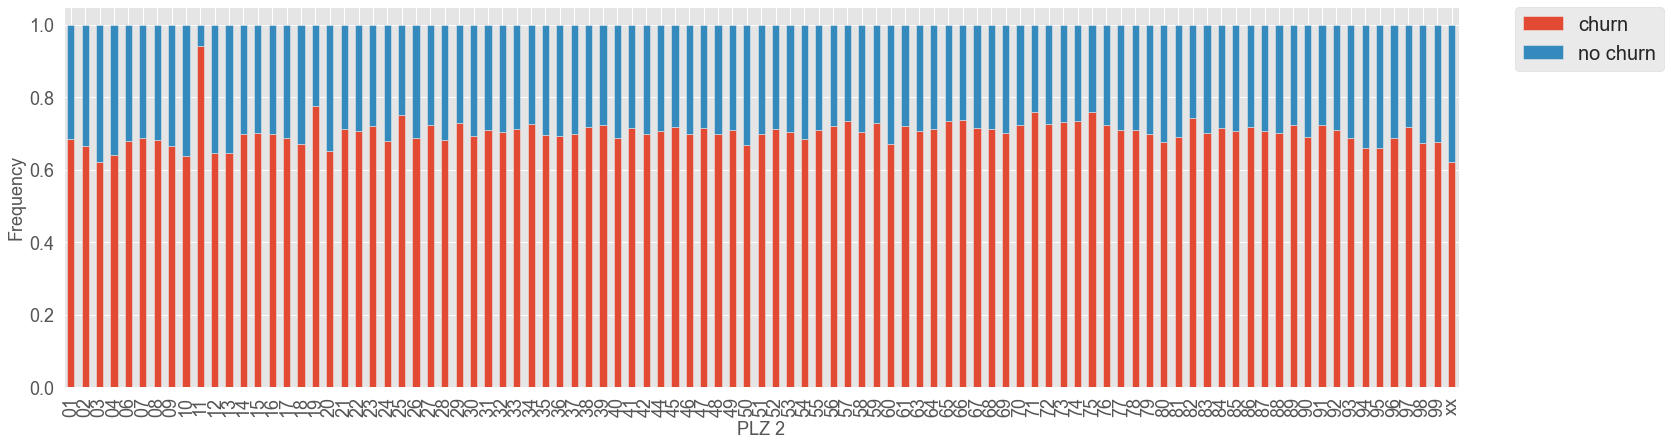

In [17]:
plz2_churn = crosstab_evaluation(df.plz_2,df.churn)
crosstab_barplot(plz2_churn,['churn','no churn'],xlabelname='PLZ 2',figsize_x=25)

In [119]:
# dataframe to map below
type(plz2_churn)

pandas.core.frame.DataFrame

### PLZ3

In [109]:
# group the dataset by first two zip codes and get the average churn rate
#grp_plz1 = df.groupby('plz_1').churn.value_counts()
#df.groupby(['plz_1','churn'])
type(df.groupby('plz_1').churn.value_counts())

df.groupby(["plz_1", "churn"]).count()

#df.groupby("plz_1").churn.size().to_frame(name = 'count').reset_index()

# add two columns churn1 und churn1
grouped_df = df.groupby(["plz_1", "churn"])

pd.DataFrame(grouped_df.size().reset_index(name = "Group_Count"))

,plz_1,churn,Group_Count
0,0,0,3778
1,0,1,1881
2,1,0,10390
3,1,1,5349
4,2,0,13694
5,2,1,5852
6,3,0,8965
7,3,1,3722
8,4,0,10402
9,4,1,4355


In [94]:
grp_plz1

plz_1  churn
0      0        3778 
       1        1881 
1      0        10390
       1        5349 
2      0        13694
       1        5852 
3      0        8965 
       1        3722 
4      0        10402
       1        4355 
5      0        11551
       1        4958 
6      0        10223
       1        4154 
7      0        12901
       1        4898 
8      0        11143
       1        4679 
9      0        6318 
       1        2759 
xx     0        12326
       1        7462 
Name: churn, dtype: int64

Link zu geopandas für Deutschland: https://juanitorduz.github.io/germany_plots/

In [18]:
# geodata
plz_shape_df = gpd.read_file('data/plz-gebiete.shp', dtype={'plz': str})

plz_shape_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8706 entries, 0 to 8705
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   plz       8706 non-null   object  
 1   note      8706 non-null   object  
 2   geometry  8706 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 204.2+ KB


In [19]:
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

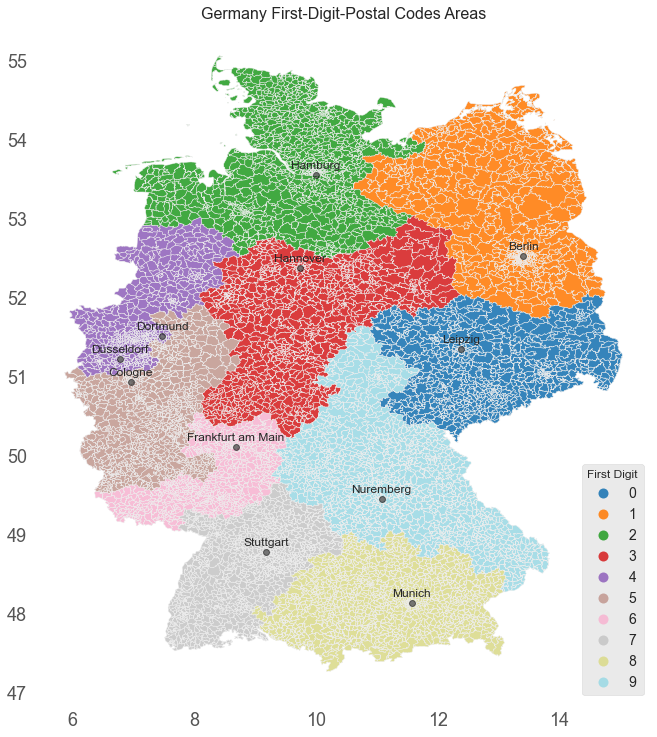

In [20]:
# Create feature.
plz_shape_df = plz_shape_df \
    .assign(first_dig_plz = lambda x: x['plz'].str.slice(start=0, stop=1))
fig, ax = plt.subplots(figsize=(11,16))

plz_shape_df.plot(
    ax=ax, 
    column='first_dig_plz', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'First Digit', 'loc':'lower right'},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany First-Digit-Postal Codes Areas', 
    aspect=1.3,
    facecolor='white'
);

In [21]:
plz_region_df = pd.read_csv(
    'data/zuordnung_plz_ort.csv', 
    sep=',', 
    dtype={'plz': str}
)

plz_region_df.drop('osm_id', axis=1, inplace=True)

plz_region_df.head()

,ort,plz,bundesland
0,Aach,78267,Baden-Württemberg
1,Aach,54298,Rheinland-Pfalz
2,Aachen,52062,Nordrhein-Westfalen
3,Aachen,52064,Nordrhein-Westfalen
4,Aachen,52066,Nordrhein-Westfalen


In [22]:
# Merge data.
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_df, 
    on='plz',
    how='inner'
)

germany_df.drop(['note'], axis=1, inplace=True)

In [23]:
plz_einwohner_df = pd.read_csv(
    'data/plz_einwohner.csv', 
    sep=',', 
    dtype={'plz': str, 'einwohner': int}
)

plz_einwohner_df.head()

,plz,einwohner
0,01067,11957
1,01069,25491
2,01097,14811
3,01099,28021
4,01108,5876


In [24]:
# Merge data.
germany_df = pd.merge(
    left=germany_df, 
    right=plz_einwohner_df, 
    on='plz',
    how='left'
)

#germany_df.head()

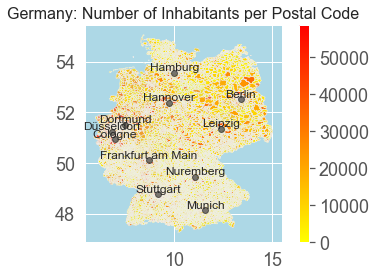

In [25]:
fig, ax = plt.subplots()

germany_df.plot(
    ax=ax, 
    column='einwohner', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Number of Inhabitants per Postal Code', 
    aspect=1.3, 
    facecolor='lightblue'
);

### Metropole

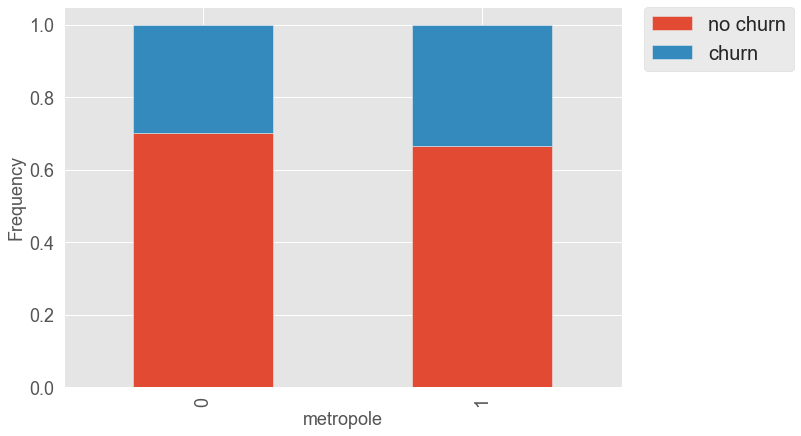

In [114]:
metropole_churn = crosstab_evaluation(df.metropole,df.churn)
crosstab_barplot(metropole_churn,['no churn','churn'],xlabelname='metropole')

### Land iso code

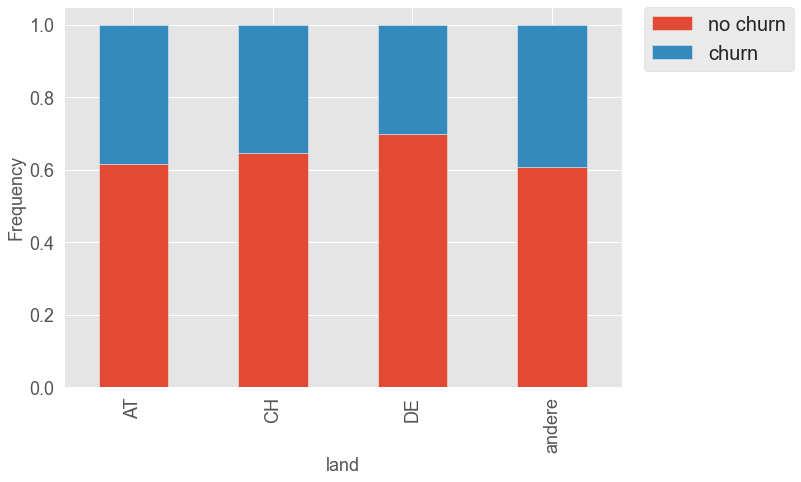

In [115]:
land_iso_churn = crosstab_evaluation(df.land_iso_code,df.churn)
crosstab_barplot(land_iso_churn,['no churn','churn'],xlabelname='land')

### Ort/City

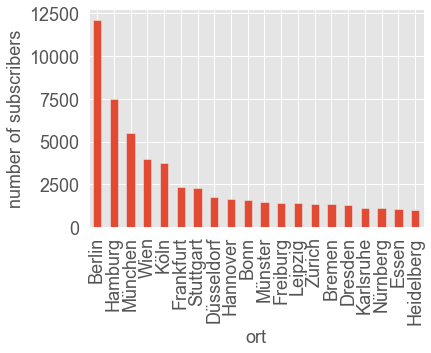

In [62]:
a = df.groupby('ort').size().nlargest(20)
a.plot(kind='bar',ylabel='number of subscribers');

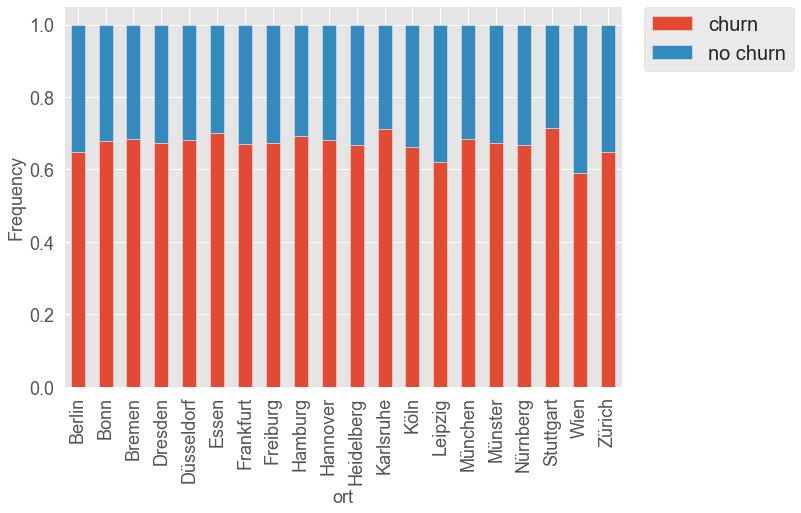

In [61]:
b = list(a.index)
df_top_cities = df[df['ort'].apply((lambda x: x in b))]

ort_churn = crosstab_evaluation(df_top_cities.ort,df_top_cities.churn)
crosstab_barplot(ort_churn,['churn','no churn'],xlabelname='ort')

### Summary

## Target Variable Analysis

Our target variable is "churn", which is 1 - churn or 0 - no churn. 

## Feature Analysis

## Observation of histograms for distribution characteristics

## Correlogram for continuous variables - Heatmap

## Overal Skew and Kurtosis of the data

## Final Feature Selection List and Dropping of Features

## Statistical distribution of our target default

## Export the dataframe to .csv file

## Conclusion

# Feature Engineering

# Predictive Modelling

## Structure of the notebooks for machine learning

We used different jupyter notebook for different methods of machine learning. These notebooks are linked here:
    
- ...

- ...

- ...

- ...

# Data Visualization

The results and our main finding can be found in our presentation:

# Future Work

The aspects of future work can be found in our presentation. 